In [1]:
import pandas as pd

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: openpyxl in c:\users\josga\appdata\local\programs\python\python312\lib\site-packages (3.1.2)




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_excel("BDVigas_Paper_v3.xlsx",sheet_name="Sheet1")
df

,b (mm),fc (MPa),Mu (Kn.m),p_opt,R_opt,d_opt (cm),As (cm^2)
0,200,21,100,0.009954,0.523773,39.039718,7.771727
1,200,28,100,0.010563,0.501796,37.401701,7.901683
2,200,35,100,0.010966,0.488321,36.397314,7.982857
3,200,21,100,0.009954,0.523773,39.039718,7.771727
4,200,28,100,0.010563,0.501796,37.401701,7.901683
...,...,...,...,...,...,...,...
359995,400,28,2000,0.010563,0.501796,118.274563,49.974630
359996,400,35,2000,0.010966,0.488321,115.098414,50.488020
359997,400,21,2000,0.009954,0.523773,123.454427,49.152717
359998,400,28,2000,0.010563,0.501796,118.274563,49.974630


In [4]:
y = df["As (cm^2)"]
x = df[["b (mm)", "fc (MPa)","Mu (Kn.m)"]]

In [5]:
y

0          7.771727
1          7.901683
2          7.982857
3          7.771727
4          7.901683
            ...    
359995    49.974630
359996    50.488020
359997    49.152717
359998    49.974630
359999    50.488020
Name: As (cm^2), Length: 360000, dtype: float64

In [6]:
x

,b (mm),fc (MPa),Mu (Kn.m)
0,200,21,100
1,200,28,100
2,200,35,100
3,200,21,100
4,200,28,100
...,...,...,...
359995,400,28,2000
359996,400,35,2000
359997,400,21,2000
359998,400,28,2000


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1234)

In [9]:
xtrain

,b (mm),fc (MPa),Mu (Kn.m)
305794,375,28,1700
7482,200,21,100
346323,400,21,2000
119192,250,35,700
197215,300,28,1100
...,...,...,...
318129,375,21,1800
294543,375,21,1700
344728,400,28,2000
220532,325,35,1300


In [10]:
xtest

,b (mm),fc (MPa),Mu (Kn.m)
100924,250,28,600
36742,200,28,300
278916,350,21,1600
313272,375,21,1800
157385,275,35,900
...,...,...,...
117946,250,28,700
167515,300,28,1000
143718,275,21,800
312918,375,21,1800


In [11]:
ytrain

305794    44.611280
7482       7.771727
346323    49.152717
119192    23.613609
197215    32.096787
            ...    
318129    45.149653
294543    43.877576
344728    49.974630
220532    36.690759
165158    30.917472
Name: As (cm^2), Length: 288000, dtype: float64

In [12]:
ytest

100924    21.639649
36742     13.686116
278916    41.124113
313272    45.149653
157385    28.082188
            ...    
117946    23.373493
167515    30.603086
143718    25.775902
312918    45.149653
202952    35.251341
Name: As (cm^2), Length: 72000, dtype: float64

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense( 40, activation = "relu", input_shape=(xtrain.shape[1],) ),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 1 )
])

c:\Users\josga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,761 (26.41 KB)

 Trainable params: 6,761 (26.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
def RMSE(y_true,y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [17]:
# Compilar el modelo
model.compile(optimizer="Nadam",
    loss=RMSE
)

In [18]:
# Entrenando el modelo
model.fit(xtrain, ytrain, epochs = 20, verbose = True)

Epoch 1/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.9951
Epoch 2/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - loss: 0.2478
Epoch 3/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 0.1820
Epoch 4/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.1532
Epoch 5/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.1392
Epoch 6/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 0.1298
Epoch 7/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - loss: 0.1237
Epoch 8/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 105s 10ms/step - loss: 0.1180
Epoch 9/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.1124
Epoch 10/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.1081
Epoch 11/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 0.1049
Epoch 12/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - loss: 0.1025
Epoch 13/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 112s 12ms/step - loss: 0.1002
Epoch 14/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 114s 13ms/step - loss: 0.0986
Epoch 15/

   1/9000 ━━━━━━━━━━━━━━━━━━━━ 7:05 47ms/step

  15/9000 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step  

<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
C:\Users\josga\AppData\Local\Temp\ipykernel_21380\2663611649.py:24: SyntaxWarning: invalid escape sequence '\c'
  plt.text(35, 25, f'$y = {m[0]:.2f} \cdot x + {b[0]:.2f}$', fontsize=10)


9000/9000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
MSE: 0.01303876527483203
RMSE: 0.11418741294394943


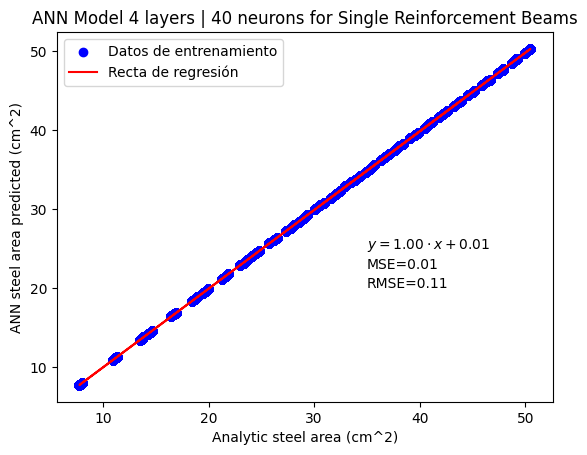

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculamos las predicciones del modelo
y_pred = model.predict(xtrain)

# Calculamos el MSE
mse = mean_squared_error(ytrain, y_pred)
print("MSE:", mse)

# Calculamos el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain, y_pred, 1)

# Ploteo de resultados
plt.scatter(ytrain, y_pred, color='blue', label='Datos de entrenamiento')
plt.plot(ytrain, m*ytrain + b, color='red', label='Recta de regresión')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(35, 25, f'$y = {m[0]:.2f} \cdot x + {b[0]:.2f}$', fontsize=10)
plt.text(35, 22.5, f'MSE={mse:.2f}', fontsize=10)
plt.text(35, 20, f'RMSE={rmse:.2f}', fontsize=10)

plt.xlabel("Analytic steel area (cm^2)")
plt.ylabel("ANN steel area predicted (cm^2)")
plt.title("ANN Model 4 layers | 40 neurons for Single Reinforcement Beams")
plt.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcae7221e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcae7227e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcae721f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcae722db0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcae723050>],
 'means': []}

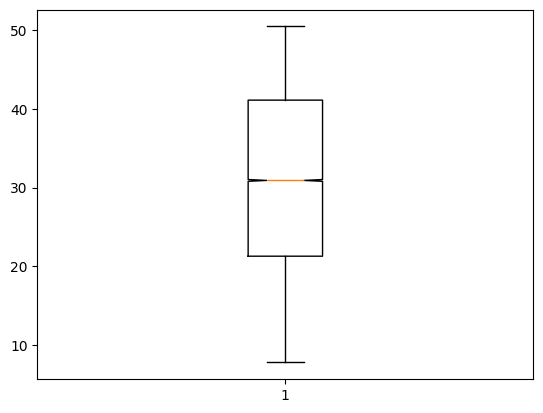

In [20]:
plt.boxplot(ytest,"o")

In [21]:
#Datos de ETABS
b = [550] #Base de la Viga (mm)
fc = [31] #Resistencia a la compresión del Concreto (MPa)
Mu = [2500] #Momento Último (kN.m)

#Almacenamiento de datos del ETABS
data_Etabs = pd.DataFrame()
data_Etabs['b (mm)'] = b
data_Etabs['fc (MPa)'] = fc
data_Etabs['Mu (Kn.m)'] = Mu

#Evaluación en el Modelo entrenado por ANN
y_As = model.predict(data_Etabs)

imprimir = f"El Área de Acero (As) es {y_As} cm^2"
print(imprimir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
El Área de Acero (As) es [[64.99992]] cm^2
